In [127]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("flipkart_com-ecommerce_sample.csv")

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# EDA

In [4]:
df_new = df[['product_name','description']]

In [5]:
df_new.head()

,product_name,description
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...


In [6]:
df_new.shape

(20000, 2)

In [7]:
df_new.drop_duplicates(subset='product_name',inplace=True)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1390390510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop_duplicates(subset='product_name',inplace=True)


In [8]:
df_new.shape

(12676, 2)

In [9]:
df_new.isnull().sum()

product_name    0
description     1
dtype: int64

In [10]:
df_new.description = df_new.description.fillna("")

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/4030495261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.description = df_new.description.fillna("")


In [11]:
df_new.dtypes

product_name    object
description     object
dtype: object

In [12]:
df_new.head()

,product_name,description
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...


In [13]:
df_new['desc_len'] = df_new.description.apply(lambda x: len(x) if type(x) == str else 0)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1209743586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['desc_len'] = df_new.description.apply(lambda x: len(x) if type(x) == str else 0)


In [14]:
df_new.head()

,product_name,description,desc_len
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,410
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,4433
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,650
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,248
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,872


In [15]:
df_new.describe()

,desc_len
count,12676.000000
mean,451.001657
std,463.395014
min,0.000000
25%,197.000000
50%,238.500000
75%,533.000000
max,5309.000000


# Baseline recommendation model with description

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(stop_words='english')
df_new['description'] = df_new['description'].fillna("")
tfidf_matrix = tfidf.fit_transform(df_new['description'])

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1938607436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['description'] = df_new['description'].fillna("")


In [18]:
from sklearn.metrics.pairwise import linear_kernel

In [19]:
linear_kernel_similarity = linear_kernel(tfidf_matrix,tfidf_matrix)

In [21]:
len(df_new.product_name)

12676

In [23]:
df_new.reset_index(inplace=True)

In [24]:
df_new.drop('index',1,inplace=True)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/2174698454.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_new.drop('index',1,inplace=True)
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/2174698454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('index',1,inplace=True)


In [25]:
indices = pd.Series(df_new.index,index = df_new.product_name).drop_duplicates()
indices

product_name
Alisha Solid Women's Cycling Shorts                                          0
FabHomeDecor Fabric Double Sofa Bed                                          1
AW Bellies                                                                   2
Sicons All Purpose Arnica Dog Shampoo                                        3
Eternal Gandhi Super Series Crystal Paper Weights  with Silver Finish        4
                                                                         ...  
Purple Women Heels                                                       12671
Uberlyfe Large Vinyl Sticker                                             12672
We Witches Comfy Hues Women Wedges                                       12673
Stylistry Women Heels                                                    12674
Uberlyfe Extra Large Vinyl Sticker                                       12675
Length: 12676, dtype: int64

In [26]:
indices['Elite Collection Medium Acrylic Sticker']

12652

In [44]:
def get_recommendation(title,linear_kernel=linear_kernel_similarity):
    idx = indices[title]
    sim_scores = enumerate(linear_kernel_similarity[idx])
    sim_scores = sorted(sim_scores,key = lambda x: x[1],reverse=True)
    sim_scores = sim_scores[:11]
    sim_indices = [i[0] for i in sim_scores]
    recommendations = df_new[['product_name','description']].iloc[sim_indices]
    recommendations['similarity_score'] = [i[1] for i in sim_scores]
    recommendations.set_index("product_name",inplace=True)
    return recommendations

,description,similarity_score
product_name,,
Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,1.000000
Sicons All Purpose Tea Tree Dog Shampoo,Specifications of Sicons All Purpose Tea Tree ...,0.715363
Sicons Conditioning Conditoner Dog Shampoo,Specifications of Sicons Conditioning Conditon...,0.635456
Rockmantra Dog Ceramic Mug,Buy Rockmantra Dog Ceramic Mug for Rs.199 onli...,0.225596
"Four Paws Sweats for Cat, Dog","Specifications of Four Paws Sweats for Cat, Do...",0.208085
Babyoye Premium Dog Face Bib,Specifications of Babyoye Premium Dog Face Bib...,0.206198
Magideal Raincoat for Dog,Magideal Raincoat for Dog (Black) Price: Rs. 1...,0.205096
Royal Canin Maxi Starter 1kg Vegetable Dog Food,Specifications of Royal Canin Maxi Starter 1kg...,0.161534
Pawzone Round Stainless Steel Pet Bowl,Key Features of Pawzone Round Stainless Steel ...,0.156756


In [49]:
get_recommendation("Lapguard Dell Inspiron 1525 Replacement 6 Cell Laptop Battery")

,description,similarity_score
product_name,,
Lapguard Dell Inspiron 1525 Replacement 6 Cell Laptop Battery,Buy Lapguard Dell Inspiron 1525 Replacement 6 ...,1.000000
RCE Dell Inspiron WK379 9 Cell Laptop Battery,Buy RCE Dell Inspiron WK379 9 Cell Laptop Batt...,0.569718
Lapguard Dell U661H Compatible Black 6 Cell Laptop Battery,Buy Lapguard Dell U661H Compatible Black 6 Cel...,0.555435
Lapguard HP Pavilion dv2124tu Replacement 6 Cell Laptop Battery,Buy Lapguard HP Pavilion dv2124tu Replacement ...,0.510024
Lapguard HP Pavilion DV1718TU Replacement 6 Cell Laptop Battery,Buy Lapguard HP Pavilion DV1718TU Replacement ...,0.510024
Lapguard HP Pavilion DV1040US Replacement 6 Cell Laptop Battery,Buy Lapguard HP Pavilion DV1040US Replacement ...,0.510024
Lapguard HP Pavilion DV4129EA Compatible Black 6 Cell Laptop Battery,Buy Lapguard HP Pavilion DV4129EA Compatible B...,0.480073
Lapguard HP Pavilion dv6159EA Compatible Black 6 Cell Laptop Battery,Buy Lapguard HP Pavilion dv6159EA Compatible B...,0.480073
Dell Sports Laptop Backpack,Flipkart.com: Buy Dell Sports Laptop Backpack ...,0.439437


# 2nd Model

In [50]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [137]:
df_2 = df.copy()

In [138]:
df_2.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [249]:
df2 = df_2[['product_name','description','product_category_tree','discounted_price','product_specifications','brand']]

In [250]:
df2.drop_duplicates(subset='product_name',inplace=True)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/178365471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset='product_name',inplace=True)


In [251]:
df2.head()

,product_name,description,product_category_tree,discounted_price,product_specifications,brand
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",379.0,"{""product_specification""=>[{""key""=>""Number of ...",Alisha
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B...",22646.0,"{""product_specification""=>[{""key""=>""Installati...",FabHomeDecor
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >...",499.0,"{""product_specification""=>[{""key""=>""Ideal For""...",AW
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",210.0,"{""product_specification""=>[{""key""=>""Pet Type"",...",Sicons
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,"[""Eternal Gandhi Super Series Crystal Paper We...",430.0,"{""product_specification""=>[{""key""=>""Model Name...",Eternal Gandhi


In [252]:
df2.shape

(12676, 6)

In [253]:
cat_tree = json.loads(df2.product_category_tree[0])[0]
cat_tree = cat_tree.split(">>")
cat_tree = [x.strip() for x in cat_tree]
cat_tree[0]

'Clothing'

In [254]:
def get_category(tree):
    cat_tree = json.loads(tree)[0]
    cat_tree = cat_tree.split(">>")
    cat_tree = [x.strip() for x in cat_tree]
    return cat_tree[0]

def get_sub_category(tree):
    cat_tree = json.loads(tree)[0]
    cat_tree = cat_tree.split(">>")
    cat_tree = [x.strip() for x in cat_tree]
    try:
        sub_cat = cat_tree[1]
    except:
        sub_cat = ""
    return sub_cat

In [255]:
get_sub_category(df2.product_category_tree[0])

"Women's Clothing"

In [256]:
df2['category'] = df2.product_category_tree.apply(get_category)
df2['sub_category'] = df2.product_category_tree.apply(get_sub_category)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1028089047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['category'] = df2.product_category_tree.apply(get_category)
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1028089047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sub_category'] = df2.product_category_tree.apply(get_sub_category)


In [257]:
df2.head()

,product_name,description,product_category_tree,discounted_price,product_specifications,brand,category,sub_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",379.0,"{""product_specification""=>[{""key""=>""Number of ...",Alisha,Clothing,Women's Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B...",22646.0,"{""product_specification""=>[{""key""=>""Installati...",FabHomeDecor,Furniture,Living Room Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >...",499.0,"{""product_specification""=>[{""key""=>""Ideal For""...",AW,Footwear,Women's Footwear
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",210.0,"{""product_specification""=>[{""key""=>""Pet Type"",...",Sicons,Pet Supplies,Grooming
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,"[""Eternal Gandhi Super Series Crystal Paper We...",430.0,"{""product_specification""=>[{""key""=>""Model Name...",Eternal Gandhi,Eternal Gandhi Super Series Crystal Paper Weig...,


In [258]:
prod_dict = json.loads(df2.product_specifications[0].replace("=>",":"))
prod_dict

{'product_specification': [{'key': 'Number of Contents in Sales Package',
   'value': 'Pack of 3'},
  {'key': 'Fabric', 'value': 'Cotton Lycra'},
  {'key': 'Type', 'value': 'Cycling Shorts'},
  {'key': 'Pattern', 'value': 'Solid'},
  {'key': 'Ideal For', 'value': "Women's"},
  {'value': 'Gentle Machine Wash in Lukewarm Water, Do Not Bleach'},
  {'key': 'Style Code', 'value': 'ALTHT_3P_21'},
  {'value': '3 shorts'}]}

In [259]:
prod_dict['product_specification'][0]

{'key': 'Number of Contents in Sales Package', 'value': 'Pack of 3'}

In [260]:
dict_list = prod_dict['product_specification']
# {key:value for key,value in }
dict_list

[{'key': 'Number of Contents in Sales Package', 'value': 'Pack of 3'},
 {'key': 'Fabric', 'value': 'Cotton Lycra'},
 {'key': 'Type', 'value': 'Cycling Shorts'},
 {'key': 'Pattern', 'value': 'Solid'},
 {'key': 'Ideal For', 'value': "Women's"},
 {'value': 'Gentle Machine Wash in Lukewarm Water, Do Not Bleach'},
 {'key': 'Style Code', 'value': 'ALTHT_3P_21'},
 {'value': '3 shorts'}]

In [261]:
for x in dict_list:
    print(x)
    print({x['key']:x['value']})

{'key': 'Number of Contents in Sales Package', 'value': 'Pack of 3'}
{'Number of Contents in Sales Package': 'Pack of 3'}
{'key': 'Fabric', 'value': 'Cotton Lycra'}
{'Fabric': 'Cotton Lycra'}
{'key': 'Type', 'value': 'Cycling Shorts'}
{'Type': 'Cycling Shorts'}
{'key': 'Pattern', 'value': 'Solid'}
{'Pattern': 'Solid'}
{'key': 'Ideal For', 'value': "Women's"}
{'Ideal For': "Women's"}
{'value': 'Gentle Machine Wash in Lukewarm Water, Do Not Bleach'}


KeyError: 'key'

In [262]:
df2.head()

,product_name,description,product_category_tree,discounted_price,product_specifications,brand,category,sub_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",379.0,"{""product_specification""=>[{""key""=>""Number of ...",Alisha,Clothing,Women's Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B...",22646.0,"{""product_specification""=>[{""key""=>""Installati...",FabHomeDecor,Furniture,Living Room Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >...",499.0,"{""product_specification""=>[{""key""=>""Ideal For""...",AW,Footwear,Women's Footwear
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",210.0,"{""product_specification""=>[{""key""=>""Pet Type"",...",Sicons,Pet Supplies,Grooming
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,"[""Eternal Gandhi Super Series Crystal Paper We...",430.0,"{""product_specification""=>[{""key""=>""Model Name...",Eternal Gandhi,Eternal Gandhi Super Series Crystal Paper Weig...,


In [263]:
df2.describe()

,discounted_price
count,12620.000000
mean,2163.477734
std,8191.443308
min,35.000000
25%,350.000000
50%,599.000000
75%,1199.000000
max,571230.000000


<AxesSubplot: >

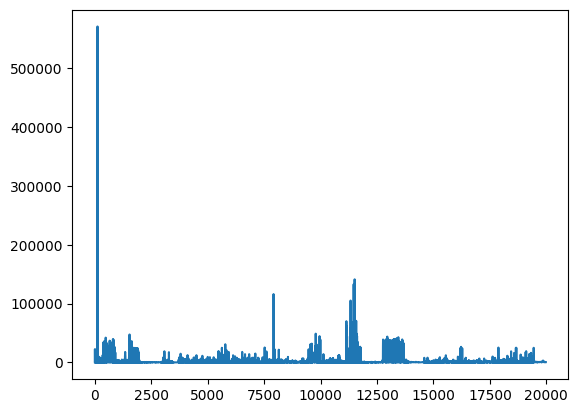

In [264]:
df2.discounted_price.plot()

In [265]:
scaler = MinMaxScaler()
df2.discounted_price = scaler.fit_transform(df2.discounted_price.values.reshape(-1,1))

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/545227136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.discounted_price = scaler.fit_transform(df2.discounted_price.values.reshape(-1,1))


In [266]:
df2.head()

,product_name,description,product_category_tree,discounted_price,product_specifications,brand,category,sub_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",0.000602,"{""product_specification""=>[{""key""=>""Number of ...",Alisha,Clothing,Women's Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B...",0.039585,"{""product_specification""=>[{""key""=>""Installati...",FabHomeDecor,Furniture,Living Room Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >...",0.000812,"{""product_specification""=>[{""key""=>""Ideal For""...",AW,Footwear,Women's Footwear
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",0.000306,"{""product_specification""=>[{""key""=>""Pet Type"",...",Sicons,Pet Supplies,Grooming
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,"[""Eternal Gandhi Super Series Crystal Paper We...",0.000692,"{""product_specification""=>[{""key""=>""Model Name...",Eternal Gandhi,Eternal Gandhi Super Series Crystal Paper Weig...,


In [267]:
df2.describe()

,discounted_price
count,12620.000000
mean,0.003726
std,0.014341
min,0.000000
25%,0.000551
50%,0.000987
75%,0.002038
max,1.000000


In [268]:
df2.shape

(12676, 8)

In [269]:
cats = df2.category.value_counts().reset_index()
cats[cats['category']<=5]
cats = cats.rename(columns={"category":"counts","index":"category"})

In [270]:
cats

,category,counts
0,Clothing,3023
1,Jewellery,1950
2,Automotive,986
3,Footwear,833
4,Home Decor & Festive Needs,678
...,...,...
232,INKT INKT A5 Wiro Notebook A5 Notebook Ring Bo...,1
233,E'Hiose Girl's Leggings (Pack of 6),1
234,"Lucky Thailand GL/ LG30 Glass (300 ml, Clear, ...",1
235,"Ocean GP/Pyramid Glass (300 ml, Clear, Pack of...",1


In [271]:
cats['new_cat'] = cats.apply(lambda x: x.category if x.counts > 1 else "",axis=1)

In [272]:
cats.dropna(inplace=True)

In [273]:
cats.drop('counts',1,inplace=True)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/233780618.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cats.drop('counts',1,inplace=True)


In [274]:
new_cats = cats.to_dict('record')
new_cat_map = {}
for cat in new_cats:
    new_cat_map[cat['category']] = cat['new_cat']
new_cat_map

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/446245310.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  new_cats = cats.to_dict('record')


{'Clothing': 'Clothing',
 'Jewellery': 'Jewellery',
 'Automotive': 'Automotive',
 'Footwear': 'Footwear',
 'Home Decor & Festive Needs': 'Home Decor & Festive Needs',
 'Beauty and Personal Care': 'Beauty and Personal Care',
 'Kitchen & Dining': 'Kitchen & Dining',
 'Computers': 'Computers',
 'Watches': 'Watches',
 'Mobiles & Accessories': 'Mobiles & Accessories',
 'Home Furnishing': 'Home Furnishing',
 'Toys & School Supplies': 'Toys & School Supplies',
 'Baby Care': 'Baby Care',
 'Pens & Stationery': 'Pens & Stationery',
 'Bags, Wallets & Belts': 'Bags, Wallets & Belts',
 'Tools & Hardware': 'Tools & Hardware',
 'Sports & Fitness': 'Sports & Fitness',
 'Furniture': 'Furniture',
 'Cameras & Accessories': 'Cameras & Accessories',
 'Home Improvement': 'Home Improvement',
 'Health & Personal Care Appliances': 'Health & Personal Care Appliances',
 'Gaming': 'Gaming',
 'Sunglasses': 'Sunglasses',
 'Home & Kitchen': 'Home & Kitchen',
 'Home Entertainment': 'Home Entertainment',
 'Pet Supplie

In [275]:
df2.category = df2.category.map(new_cat_map,na_action='ignore')

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/2897610047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.category = df2.category.map(new_cat_map,na_action='ignore')


In [276]:
df2.head()

,product_name,description,product_category_tree,discounted_price,product_specifications,brand,category,sub_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",0.000602,"{""product_specification""=>[{""key""=>""Number of ...",Alisha,Clothing,Women's Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B...",0.039585,"{""product_specification""=>[{""key""=>""Installati...",FabHomeDecor,Furniture,Living Room Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >...",0.000812,"{""product_specification""=>[{""key""=>""Ideal For""...",AW,Footwear,Women's Footwear
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",0.000306,"{""product_specification""=>[{""key""=>""Pet Type"",...",Sicons,Pet Supplies,Grooming
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,"[""Eternal Gandhi Super Series Crystal Paper We...",0.000692,"{""product_specification""=>[{""key""=>""Model Name...",Eternal Gandhi,,


In [277]:
tfidf_matrix.shape

(12676, 24646)

In [278]:
sub_cats = df2.sub_category.value_counts().reset_index()
sub_cats[sub_cats['sub_category']<=5]
sub_cats = sub_cats.rename(columns={"sub_category":"counts","index":"sub_category"})

In [279]:
sub_cats

,sub_category,counts
0,Women's Clothing,2012
1,Accessories & Spare parts,907
2,Necklaces & Chains,800
3,Men's Clothing,667
4,Rings,523
...,...,...
208,CEAT 4.00-8 Buland Tube Tyre,1
209,CEAT 3.00-18 Secura Sport Tube Tyre,1
210,HH Aviator Sunglasses,1
211,Aligatorr Aviator Sunglasses,1


In [280]:
sub_cats['new_sub_cat'] = sub_cats.apply(lambda x: x.sub_category if x.counts > 1 else "",axis=1)
sub_cats.drop('counts',1,inplace=True)

new_sub_cats = sub_cats.to_dict('record')
new_sub_cat_map = {}
for sub_cat in new_sub_cats:
    new_sub_cat_map[sub_cat['sub_category']] = sub_cat['new_sub_cat']
new_sub_cat_map

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/3845637914.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sub_cats.drop('counts',1,inplace=True)
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/3845637914.py:4: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  new_sub_cats = sub_cats.to_dict('record')


{"Women's Clothing": "Women's Clothing",
 'Accessories & Spare parts': 'Accessories & Spare parts',
 'Necklaces & Chains': 'Necklaces & Chains',
 "Men's Clothing": "Men's Clothing",
 'Rings': 'Rings',
 'Wrist Watches': 'Wrist Watches',
 "Women's Footwear": "Women's Footwear",
 'Bangles, Bracelets & Armlets': 'Bangles, Bracelets & Armlets',
 'Fragrances': 'Fragrances',
 "Kids' Clothing": "Kids' Clothing",
 'Laptop Accessories': 'Laptop Accessories',
 'Coffee Mugs': 'Coffee Mugs',
 'Showpieces': 'Showpieces',
 'Mobile Accessories': 'Mobile Accessories',
 "Men's Footwear": "Men's Footwear",
 'School Supplies': 'School Supplies',
 '': '',
 'Network Components': 'Network Components',
 'Tablet Accessories': 'Tablet Accessories',
 'Tools': 'Tools',
 'Bed Linen': 'Bed Linen',
 'Bags': 'Bags',
 'Table Decor & Handicrafts': 'Table Decor & Handicrafts',
 'Infant Wear': 'Infant Wear',
 'Jewellery Sets': 'Jewellery Sets',
 'Cookware': 'Cookware',
 'Office Supplies': 'Office Supplies',
 'Wall Decor 

In [281]:
df2.sub_category = df2.sub_category.map(new_sub_cat_map,na_action='ignore')

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1242400148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sub_category = df2.sub_category.map(new_sub_cat_map,na_action='ignore')


In [283]:
brands = df2.brand.value_counts().reset_index()
brands = brands.rename(columns={"brand":"counts","index":"brand"})

brands['new_brand'] = brands.apply(lambda x: x.brand if x.counts > 1 else "",axis=1)
brands.drop('counts',1,inplace=True)

brands = brands.to_dict('record')
new_brands_map = {}
for brand in brands:
    new_brands_map[brand['brand']] = brand['new_brand']

df2.brand = df2.brand.map(new_brands_map,na_action='ignore')


/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1806239683.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  brands.drop('counts',1,inplace=True)
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1806239683.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  brands = brands.to_dict('record')
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1806239683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.brand = df2.brand.map(new_brands_map,na_act

In [284]:
df2_features = df2[['product_name','description','discounted_price','category','sub_category','brand']]
df2_features.head()

,product_name,description,discounted_price,category,sub_category,brand
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,0.000602,Clothing,Women's Clothing,
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,0.039585,Furniture,Living Room Furniture,
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,0.000812,Footwear,Women's Footwear,AW
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,0.000306,Pet Supplies,Grooming,Sicons
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,0.000692,,,


In [285]:
df2_features.shape

(12676, 6)

In [286]:
from sklearn.preprocessing import LabelEncoder

cat_le = LabelEncoder()
sub_cat_le = LabelEncoder()
brand_le = LabelEncoder()

df2_features.category = cat_le.fit_transform(df2_features.category)
df2_features.sub_category = sub_cat_le.fit_transform(df2_features.sub_category)
df2_features.brand = brand_le.fit_transform(df2_features.brand)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/2233056999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_features.category = cat_le.fit_transform(df2_features.category)
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/2233056999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_features.sub_category = sub_cat_le.fit_transform(df2_features.sub_category)
/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/2233056999.py:9: SettingWithCopyWarning: 
A va

In [287]:
df2_features.head()

,product_name,description,discounted_price,category,sub_category,brand
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,0.000602,6,142,0
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,0.039585,14,84,0
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,0.000812,13,143,33
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,0.000306,27,55,893
5,Eternal Gandhi Super Series Crystal Paper Weig...,Key Features of Eternal Gandhi Super Series Cr...,0.000692,0,0,0


In [288]:
df2_features.isnull().sum()

product_name         0
description          1
discounted_price    56
category             0
sub_category         0
brand                0
dtype: int64

In [289]:
df2_features.description = df2_features.description.fillna("")

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/2598609567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_features.description = df2_features.description.fillna("")


In [299]:
df2_features.groupby(['brand','sub_category'])['discounted_price'].transform('mean')

0        0.001548
1        0.039192
2        0.000812
4        0.000210
5        0.002109
           ...   
19936    0.001913
19948    0.001452
19958    0.001913
19962    0.001913
19976    0.001452
Name: discounted_price, Length: 12676, dtype: float64

In [300]:
df2_features['discounted_price'].fillna(df2_features.groupby(['brand','sub_category'])['discounted_price'].transform('mean'),inplace=True)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/3665066452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_features['discounted_price'].fillna(df2_features.groupby(['brand','sub_category'])['discounted_price'].transform('mean'),inplace=True)


In [301]:
df2_features.isnull().sum()

product_name        0
description         0
discounted_price    9
category            0
sub_category        0
brand               0
dtype: int64

In [302]:
df2_features['discounted_price'].fillna(df2_features['discounted_price'].mean(),inplace=True)

/var/folders/dm/s7p9m_4j3bgfqrvz0vd81ss40000gn/T/ipykernel_4249/1794931381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_features['discounted_price'].fillna(df2_features['discounted_price'].mean(),inplace=True)


In [303]:
df2_features.isnull().sum()

product_name        0
description         0
discounted_price    0
category            0
sub_category        0
brand               0
dtype: int64

In [304]:
new_feature_matrix = df2_features[['discounted_price','category','sub_category','brand']].to_numpy()
new_feature_matrix.shape

(12676, 4)

In [308]:
tfidf_matrix.shape

(12676, 24646)

In [309]:
from scipy.sparse import coo_matrix, hstack

In [310]:
new_feature_matrix = coo_matrix(new_feature_matrix)

In [311]:
new_features = hstack([tfidf_matrix,new_feature_matrix]).toarray()
new_features.shape

(12676, 24650)

In [312]:
linear_similarity = linear_kernel(new_features,new_features)

In [316]:
from sklearn.metrics.pairwise import sigmoid_kernel

sigmoid_similarity = sigmoid_kernel(new_features,new_features)

In [317]:
def get_recommendation_2nd_model(title,sigmoid_kernel=sigmoid_similarity):
    idx = indices[title]
    sim_scores = enumerate(sigmoid_similarity[idx])
    sim_scores = sorted(sim_scores,key = lambda x: x[1],reverse=True)
    sim_scores = sim_scores[:11]
    sim_indices = [i[0] for i in sim_scores]
    recommendations = df_new[['product_name','description']].iloc[sim_indices]
    recommendations['similarity_score'] = [i[1] for i in sim_scores]
    recommendations.set_index("product_name",inplace=True)
    return recommendations

In [348]:
get_recommendation("Lapguard Dell Inspiron 1525 Replacement 6 Cell Laptop Battery")

,description,similarity_score
product_name,,
Lapguard Dell Inspiron 1525 Replacement 6 Cell Laptop Battery,Buy Lapguard Dell Inspiron 1525 Replacement 6 ...,1.000000
RCE Dell Inspiron WK379 9 Cell Laptop Battery,Buy RCE Dell Inspiron WK379 9 Cell Laptop Batt...,0.569718
Lapguard Dell U661H Compatible Black 6 Cell Laptop Battery,Buy Lapguard Dell U661H Compatible Black 6 Cel...,0.555435
Lapguard HP Pavilion dv2124tu Replacement 6 Cell Laptop Battery,Buy Lapguard HP Pavilion dv2124tu Replacement ...,0.510024
Lapguard HP Pavilion DV1718TU Replacement 6 Cell Laptop Battery,Buy Lapguard HP Pavilion DV1718TU Replacement ...,0.510024
Lapguard HP Pavilion DV1040US Replacement 6 Cell Laptop Battery,Buy Lapguard HP Pavilion DV1040US Replacement ...,0.510024
Lapguard HP Pavilion DV4129EA Compatible Black 6 Cell Laptop Battery,Buy Lapguard HP Pavilion DV4129EA Compatible B...,0.480073
Lapguard HP Pavilion dv6159EA Compatible Black 6 Cell Laptop Battery,Buy Lapguard HP Pavilion dv6159EA Compatible B...,0.480073
Dell Sports Laptop Backpack,Flipkart.com: Buy Dell Sports Laptop Backpack ...,0.439437


In [319]:
get_recommendation_2nd_model("Lapguard Dell Inspiron 1525 Replacement 6 Cell Laptop Battery")

,description,similarity_score
product_name,,
Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,1.0
Sicons All Purpose Tea Tree Dog Shampoo,Specifications of Sicons All Purpose Tea Tree ...,1.0
Sicons Conditioning Conditoner Dog Shampoo,Specifications of Sicons Conditioning Conditon...,1.0
dongli Printed Boy's Round Neck T-Shirt,Specifications of dongli Printed Boy's Round N...,1.0
Glus Wedding Lingerie Set,Glus Wedding Lingerie Set - Buy Turquoise Glus...,1.0
Veelys Shiny White Quad Roller Skates - Size 4.5 UK,Veelys Shiny White Quad Roller Skates - Size 4...,1.0
Bulaky vanity case Jewellery Vanity Case,Buy Bulaky vanity case Jewellery Vanity Case f...,1.0
FDT Women's Leggings,FDT Women's Leggings - Buy Parrot Green FDT Wo...,1.0
Madcaps C38GR30 Men's Cargos,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,1.0


# 3rd model with one hot encoded features

In [325]:
df2_ohf = df2[['discounted_price','category','sub_category','brand']]
df2_ohf = pd.get_dummies(df2_ohf)
df2_ohf.head()
print(df2_ohf.memory_usage())

Index                  629832
discounted_price       101408
category_               12676
category_Automotive     12676
category_Baby Care      12676
                        ...  
brand_run of luck       12676
brand_snjmart           12676
brand_soie              12676
brand_stylishvilla      12676
brand_wallskart         12676
Length: 1346, dtype: int64


In [327]:
df2_ohf.isnull().sum()

discounted_price                  56
category_                          0
category_Automotive                0
category_Baby Care                 0
category_Bags, Wallets & Belts     0
                                  ..
brand_run of luck                  0
brand_snjmart                      0
brand_soie                         0
brand_stylishvilla                 0
brand_wallskart                    0
Length: 1345, dtype: int64

In [328]:
df2_ohf['discounted_price'].fillna(df2_ohf['discounted_price'].mean(),inplace=True)

In [330]:
df2_ohf = df2_ohf.to_numpy()

In [331]:
new_feature_matrix2 = coo_matrix(df2_ohf)

In [334]:
new_features2 = hstack([tfidf_matrix,new_feature_matrix2]).toarray()
new_features2.shape

(12676, 25991)

In [335]:
linear_similarity2 = linear_kernel(new_features2,new_features2)

In [342]:
def get_recommendation_3rd_model(title,linear_kernel=linear_similarity2):
    idx = indices[title]
    sim_scores = enumerate(linear_similarity2[idx])
    sim_scores = sorted(sim_scores,key = lambda x: x[1],reverse=True)
    sim_scores = sim_scores[:11]
    sim_indices = [i[0] for i in sim_scores]
    data = df.copy()
    data.drop_duplicates(subset='product_name',inplace=True)
    recommendations = data[['product_name','description','discounted_price']].iloc[sim_indices]
    recommendations['similarity_score'] = [i[1] for i in sim_scores]
    recommendations.set_index("product_name",inplace=True)
    return recommendations

In [346]:
get_recommendation_3rd_model("At Ur Door Men's Printed Bandana")

,description,discounted_price,similarity_score
product_name,,,
At Ur Door Men's Printed Bandana,Key Features of At Ur Door Men's Printed Banda...,350.0,4.000000
Noise Men's Printed Bandana,Key Features of Noise Men's Printed Bandana 10...,299.0,3.602198
Royal Enfield Men's Graphic Print Bandana,Key Features of Royal Enfield Men's Graphic Pr...,999.0,3.453394
CREEDS Men's Printed Casual Multicolor Shirt,Specifications of CREEDS Men's Printed Casual ...,349.0,3.174221
L'appel Du vide Men's Vest,Specifications of L'appel Du vide Men's Vest (...,699.0,3.167632
Jack & Jones Printed Men's Round Neck T-Shirt,Specifications of Jack & Jones Printed Men's R...,497.0,3.165863
Antshrike Men's Pyjama,Specifications of Antshrike Men's Pyjama (Pack...,1099.0,3.161678
Traditions Printed Protective Men's Gloves,Key Features of Traditions Printed Protective ...,399.0,3.147582
Magneto Printed Men's Boxer,Specifications of Magneto Printed Men's Boxer ...,289.0,3.145891
